In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns

In [37]:
with open("data/beatmap_data.pkl", "rb") as pkl:
    loaded = pickle.load(pkl)

b_id, b_data, b_extra_data, b_skill = zip(*[(l[1], l[2], l[3], l[4])for l in loaded])
b_extra_data = np.array(b_extra_data)
df = pd.DataFrame({"ID":b_id, "Skillset":b_skill, "AR":b_extra_data.flatten()})

df.head(3)

,ID,Skillset,AR
0,2096201,RHYTHM,0.90
1,2096523,ALT,0.96
2,2167576,ALT,0.94


<Axes: xlabel='Skillset', ylabel='percent'>

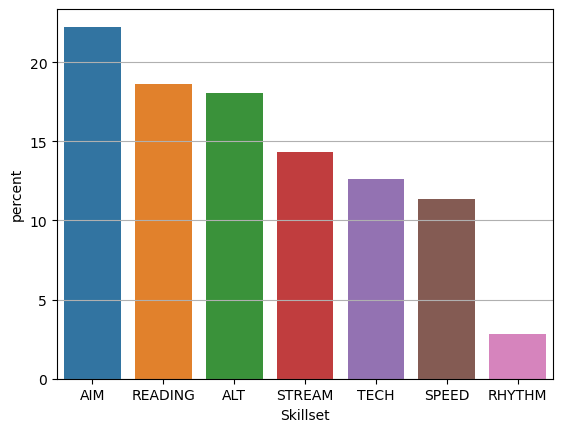

In [30]:
plt.grid()
sns.countplot(df, x="Skillset", hue="Skillset",order=df.Skillset.value_counts().keys(), hue_order=df.Skillset.value_counts().keys(), stat="percent")

In [35]:
df.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).iloc[1:]

,AR
mean,0.918629
std,0.080972
min,0.000000
5%,0.800000
25%,0.920000
50%,0.940000
75%,0.960000
95%,0.980000
max,1.000000


In [38]:
b_len = [len(b) for b in b_data]

In [39]:
stats = pd.DataFrame({"Beatmap Objects":b_len}).describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95])
stats

,Beatmap Objects
count,3943.000000
mean,1503.228760
std,553.831297
min,387.000000
25%,1125.000000
50%,1431.000000
75%,1765.000000
90%,2176.000000
95%,2546.900000
max,6914.000000


In [33]:
stats.loc["count",:]

Data Lengths    3943.0
Name: count, dtype: float64

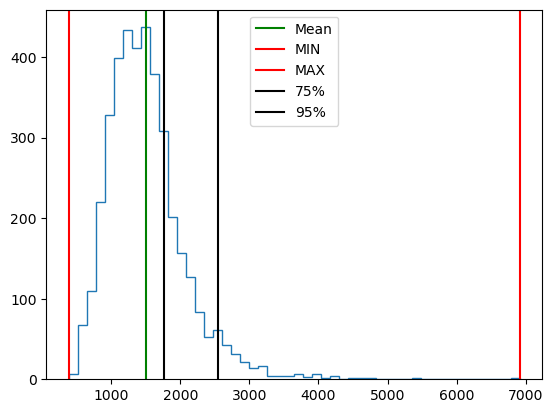

In [34]:
plt.hist(b_len, bins=50, histtype="step")
plt.axvline(stats.loc["mean"].values, color="green", label ="Mean")
plt.axvline(stats.loc["min"].values, color="red", label ="MIN")
plt.axvline(stats.loc["max"].values, color="red", label ="MAX")
plt.axvline(stats.loc["75%"].values, color="black", label ="75%")
plt.axvline(stats.loc["95%"].values, color="black", label ="95%")
plt.legend()
plt.show()